In [1]:
import pandas as pd

In [2]:
from pylab import *

In [88]:
import datetime

In [3]:
df = pd.read_pickle('data/paths.pkl.xz')

In [4]:
objs = df.groupby([
    "filename",
    "obj"]
).size().sort_values(ascending=False)

In [5]:
df_by_obj = df.set_index(['filename', 'obj']).sort_index()

In [6]:
bg = imread("data/paths0.png")

In [17]:
top_obj = objs.head(5)

# filter_by_time

In [63]:
t1 = datetime.time(1, 24, 9)
t2 = datetime.time(1, 27, 9)
specific_time = df[df.time.dt.time.between(t1,t2)]

<Figure size 432x288 with 0 Axes>

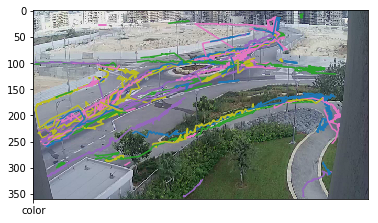

In [92]:
all = specific_time.groupby(["filename","obj"]).size().sort_values(ascending=False)
df_by_obj = df.set_index(['filename', 'obj']).sort_index()
main_info = []
for t in all.index:
    oo = df_by_obj.loc[t]
    main_info.append((oo.x,oo.y))
draw_lines(main_info,multipul = False)

# the draw function

In [48]:
from PIL import Image
img = Image.open('data/paths0.png')

In [113]:
def draw_lines(list,multipul = True):
    
    if list == []:
        fig, ax = plt.subplots()
        ax.imshow(img)
        return
        
    for i,tuple in enumerate(list):
        if multipul or i==0:
            plt.figure(i+1)
            fig, ax = plt.subplots()
            ax.imshow(img)
        plot(*tuple, '-', 'color',rand(1,3))

In [100]:
df.sample()

,x,y,obj,seq,filename,time
2285459,184,148,16,223,14-16\20170823124836_100.h264.txt,2017-08-23 12:48:36


# filter by date

In [111]:
d = datetime.date(2017, 7, 20)
specific_date = df[df.time.dt.date == d]

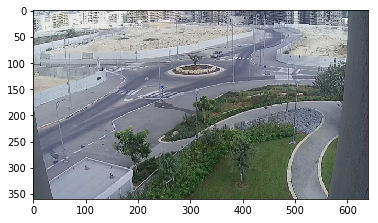

In [114]:
top10 = specific_date.groupby(["filename","obj"]).size().sort_values(ascending=False).head(10)
df_by_obj = df.set_index(['filename', 'obj']).sort_index()
main_info = []
for t in top10.index:
    oo = df_by_obj.loc[t]
    main_info.append((oo.x,oo.y))
draw_lines(main_info,multipul = False)